# **PYTHON REFRESHER**

Note: As a social science student, I placed notes throughout so I could be able to use this notebook as reference in the future, and remember concepts that aren't taught in my field.

# **RUNNING THE FIVE METHODS**

# **SECTION 1: PREPROCESSING**

## **6.3.1 Standardization, or Mean Removal and Variance Scaling**
Standardization is a common preprocessing technique that can be used to scale the data to have zero mean and unit variance.
This is useful because many machine learning algorithms work better when the input data is scaled and centered around 0.
- Each feature has equal importance in terms of its scale. Some features might have large values (like "salary"), while others have small values (like "age"). If not standardized, the model might give more importance to the features with larger ranges.
- Many algorithms (like gradient descent) converge faster with standardized data, as it prevents the model from getting stuck or making very small updates to certain features.
- Algorithms like SVM, k-NN, and even neural networks often perform better when data is standardized.

In [23]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

scaler.mean_

scaler.scale_

X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [24]:
# Checks if the standardization worked by calculating the mean and standard deviation after scaling.

X_scaled.mean(axis=0)
X_scaled.std(axis=0)

array([1., 1., 1.])

```
X_scaled.mean(axis=0)
```

X_scaled.mean(axis=0) returns an array [0., 0., 0.], showing that each feature has been transformed to have a mean of 0.

```
X_scaled.std(axis=0)
```
X_scaled.std(axis=0) returns an array [1., 1., 1.], indicating that each feature has been scaled to have a standard deviation (or variance) of 1.

In [25]:
# Example Pipeline
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.96

### **6.3.1.1 Scaling Features to a Range**

**MinMaxScaler:** This scaler transforms your data by scaling each feature to a given range, typically between 0 and 1. It calculates the minimum and maximum values of each feature and rescales the data to fit within that range.

**MaxAbsScaler:** This scaler scales the data by dividing each feature by its maximum absolute value, but it does not shift the data. It keeps the data within the range [-1, 1], useful when your data contains negative values.

Uses of these Scalers:
- MinMaxScaler is useful when you want to preserve the relationships between features but need them scaled to a specific range (like 0 to 1). It is commonly used when:

    - Your data needs to be transformed into a fixed range.
    - You are using algorithms like neural networks, where data should be scaled to avoid large values influencing the learning process.
- MaxAbsScaler is useful when dealing with data that is already centered (with zero mean) or when preserving sparsity (e.g., for sparse matrices). This is commonly used in algorithms where maintaining the sign of the data is important, and you only care about the magnitude.

In [26]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [27]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [28]:
min_max_scaler.scale_

min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

**scale_:** This shows the scaling factors (the difference between X_max and X_min) for each feature. After the data is rescaled, you can use this to see by how much each feature has been scaled.
- Example: If the first feature had a range from 0 to 2, the scale would be 0.5, meaning the data is multiplied by 0.5 to fit the range [0, 1].

**min_:** This shows the minimum values used for scaling. It tells you what minimum was subtracted from the data before scaling it.

#### **Scaling with Explicit Feature Range**
*Not shown in the documentation so I tried with my own sample.*

##### MinMaxScaler with Explicit Feature Range

In [29]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sample data
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

# Initialize MinMaxScaler with a custom range (e.g., [2, 5])
min_max_scaler = MinMaxScaler(feature_range=(2, 5))

# Fit and transform the training data
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(X_train_minmax)

# Optionally, transform new test data
X_test = np.array([[-3., -1., 4.]])
X_test_minmax = min_max_scaler.transform(X_test)
print(X_test_minmax)


[[3.5 2.  5. ]
 [5.  3.5 3. ]
 [2.  5.  2. ]]
[[-2.5  2.   7. ]]


##### MaxAbsScaler with Explicit Feature Range

In [30]:
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

# Sample data
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

# Initialize MaxAbsScaler
max_abs_scaler = MaxAbsScaler()

# Fit and transform the training data
X_train_maxabs = max_abs_scaler.fit_transform(X_train)

# Custom range [2, 5]
min_val, max_val = 2, 5

# Scale the data to the custom range [min_val, max_val]
X_train_scaled = (X_train_maxabs + 1) * (max_val - min_val) / 2 + min_val
print(X_train_scaled)

# Optionally, transform new test data
X_test = np.array([[-3., -1., 4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_scaled = (X_test_maxabs + 1) * (max_val - min_val) / 2 + min_val
print(X_test_scaled)


[[4.25 2.   5.  ]
 [5.   3.5  3.5 ]
 [3.5  5.   2.75]]
[[1.25 2.   6.5 ]]


##### **Additional Notes**

MinMax Scaler Formula: 

X_std = $(X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))$

X_scaled = $X_std * (max - min) + min$


MaxAbsScaler:
$Xscaled = X / max(|X|)$

In [31]:
# MaxAbsScaler
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs
max_abs_scaler.scale_

array([2., 1., 2.])

### **6.3.1.2 Scaling Sparse Data**

- MaxAbsScaler is specifically designed for scaling sparse data, and it keeps the sparse structure intact.
- StandardScaler can handle sparse data, but only if you explicitly set with_mean=False.
- This avoids centering and preserves sparsity.
RobustScaler cannot be used with sparse inputs directly, but you can scale data that has already been transformed into a sparse format.

In [32]:
# Not included in the example
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from scipy.sparse import csr_matrix

# Create a sparse matrix (Compressed Sparse Row format)
X_sparse = csr_matrix([[0, 1, 0],
                       [0, 0, 3],
                       [1, 0, 0]])

# Using MaxAbsScaler (recommended for sparse data)
max_abs_scaler = MaxAbsScaler()
X_scaled_maxabs = max_abs_scaler.fit_transform(X_sparse)

print("MaxAbsScaler Output (Sparse):")
print(X_scaled_maxabs)

# Using StandardScaler, with_mean=False (to avoid centering)
standard_scaler = StandardScaler(with_mean=False)
X_scaled_std = standard_scaler.fit_transform(X_sparse)

print("\nStandardScaler Output (Sparse, with_mean=False):")
print(X_scaled_std)

# If your sparse matrix is small, you can convert it to an array and use regular scaling
X_array = X_sparse.toarray()

print("\nConverted to Array:")
print(X_array)


MaxAbsScaler Output (Sparse):
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (3, 3)>
  Coords	Values
  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0

StandardScaler Output (Sparse, with_mean=False):
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (3, 3)>
  Coords	Values
  (0, 1)	2.1213203435596424
  (1, 2)	2.1213203435596424
  (2, 0)	2.1213203435596424

Converted to Array:
[[0 1 0]
 [0 0 3]
 [1 0 0]]


### **6.3.1.3. Scaling Data with Outliers**

- **RobustScaler:** instead of the mean and variance, it uses the median and interquartile range, which are less affected by outliers.
- **Scaling** adjusts each feature individually so they have a similar scale, but it doesn’t remove correlations between features.
- **Whitening** (using PCA with whiten=True) not only scales the features but also removes any linear correlations between them. This can be important if your model assumes that features are independent of each other.

In [33]:
# Not in the documentations
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import numpy as np

# Example data with outliers
X = np.array([[1, 2, 3],
              [2, 4, 6],
              [1000, 2000, 3000],  # Outlier
              [4, 8, 12]])

# Using RobustScaler to handle outliers
robust_scaler = RobustScaler()
X_scaled_robust = robust_scaler.fit_transform(X)

print("RobustScaler Output:")
print(X_scaled_robust)

# Using PCA with whitening to remove linear correlations
pca = PCA(whiten=True)
X_whitened = pca.fit_transform(X_scaled_robust)

print("\nPCA with Whitening Output:")
print(X_whitened)


RobustScaler Output:
[[-0.0079602 -0.0079602 -0.0079602]
 [-0.0039801 -0.0039801 -0.0039801]
 [ 3.9681592  3.9681592  3.9681592]
 [ 0.0039801  0.0039801  0.0039801]]

PCA with Whitening Output:
[[-0.50267133 -1.63619161  0.23720963]
 [-0.50066666  0.38935694  1.61153184]
 [ 1.49999531 -0.41360962  0.57413841]
 [-0.49665732  0.01432797 -0.13062089]]


### **6.3.1.4. Centering Kernel Matrices**


In [34]:
from sklearn.preprocessing import KernelCenterer
from sklearn.metrics.pairwise import pairwise_kernels
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
K = pairwise_kernels(X, metric='linear')
K
transformer = KernelCenterer().fit(K)
transformer
transformer.transform(K)

array([[  5.,   0.,  -5.],
       [  0.,  14., -14.],
       [ -5., -14.,  19.]])

## **6.3.2 Standardization, or Mean Removal and Variance Scaling**
**Non-linear Transformations** are used to adjust the distribution of your data, making it more suitable for modeling. There are two main types:

**Quantile Transforms:**
- These transform the features so that they follow a desired distribution (like normal distribution).
- They work by ranking the data and mapping it to a uniform distribution, and then to the desired distribution.
- Reduces the influence of outliers and smooths unusual distributions BUT distorts correlations and distances between features.
  
**Power Transforms:**
- These transformations aim to make the data resemble a Gaussian (normal) distribution.
- They use specific mathematical formulas to adjust the data from any distribution to be as close as possible to a normal distribution.
- Makes the data more normally distributed, which can be helpful for many statistical models but may not always be suitable if the data is already close to normal or if the transformation introduces new distortions.

### **6.3.2.1 Mapping to a Uniform Distribution**

**QuantileTransformer** provides a non-parametric transformation to map the data to a uniform distribution with values between 0 and 1:

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100]) 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


array([4.3, 5.1, 5.8, 6.5, 7.9])

In [36]:
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])

np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100])


array([0.01351351, 0.25      , 0.47747748, 0.60472973, 0.94144144])

In [37]:
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])

np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100])


array([0.01351351, 0.25      , 0.47747748, 0.60472973, 0.94144144])

### **6.3.2.2. Mapping to a Gaussian distribution**

**PowerTransformer** currently provides two such power transformations, the Yeo-Johnson transform and the Box-Cox transform.

- Box-Cox Transformation: Only works with strictly positive data. It transforms the data to approximate a normal distribution.
- Yeo-Johnson Transformation: Extends Box-Cox to work with both positive and negative data.

In [38]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
X_lognormal = np.random.RandomState(616).lognormal(size=(3, 3))
X_lognormal
pt.fit_transform(X_lognormal)

array([[ 0.49024349,  0.17881995, -0.1563781 ],
       [-0.05102892,  0.58863196, -0.57612414],
       [ 0.69420009, -0.84857822,  0.10051454]])

#### Map data to a normal distribution using QuantileTransformer by setting ``` output_distribution='normal'```

In [39]:
quantile_transformer = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=0)
X_trans = quantile_transformer.fit_transform(X)
quantile_transformer.quantiles_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(


array([[4.3, 2. , 1. , 0.1],
       [4.4, 2.2, 1.1, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.5, 2.3, 1.3, 0.1],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5.1, 2.7, 1.5, 0.2],
       [5.1, 2.8, 1.5, 0.2],
       [5.1, 2

## **6.3.3 Normalization**

Normalization is a technique used to scale individual samples so that they have a unit norm.
- Text Classification
- Clustering

In [40]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

Normalizer implements the same operation using the Transformer API (even though the fit method is useless in this case: the class is stateless as this operation treats samples independently).

```
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer
```

In [41]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer
normalizer.transform(X)

normalizer.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

## **6.3.4. Encoding Categorical Features**

**OrdinalEncoder:** transforms each categorical feature to one new feature of integers (0 to n_categories - 1):

In [42]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

OrdinalEncoder will also passthrough missing values that are indicated by np.nan

In [43]:
enc = preprocessing.OrdinalEncoder()
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [nan],
       [ 0.]])

#### Encoding Missing Values

To encode missing values without the need to create a pipeline and using SimpleImputer.

```
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
enc = Pipeline(steps=[
    ("encoder", preprocessing.OrdinalEncoder()),
    ("imputer", SimpleImputer(strategy="constant", fill_value=-1)),
])
enc.fit_transform(X)
```

The equivalent of the above is the code below:

In [44]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

##### Convert Categorical Features to Features Using Scikit-learn Estimators

In [45]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)
enc.categories_

[array(['female', 'male', nan], dtype=object)]

In [46]:
# Specify more explicitly
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])
# Note that for there are missing categorical values for the 2nd and 3rd
# feature
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

##### handle_unknown='infrequent_if_exist'
If data has missing categorical features:
- better to specify ```handle_unknown='infrequent_if_exist'``` instead of setting the ```categories```

**handle_unknown='infrequent_if_exist'**: no error will be raised but the resulting one-hot encoded columns for this feature will be all zeros or considered as an infrequent category if enabled
- is only supported for one-hot encoding

In [47]:
enc = preprocessing.OneHotEncoder(handle_unknown='infrequent_if_exist')
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 0., 0., 0.]])

##### Specify a Category for Each Feature to be Dropped

- Such functionality is useful, for example, when using non-regularized regression (LinearRegression), since co-linearity would cause the covariance matrix to be non-invertible

In [48]:
X = [['male', 'from US', 'uses Safari'],
     ['female', 'from Europe', 'uses Firefox']]
drop_enc = preprocessing.OneHotEncoder(drop='first').fit(X)
drop_enc.categories_
drop_enc.transform(X).toarray()

array([[1., 1., 1.],
       [0., 0., 0.]])

In [49]:
X = [['male', 'US', 'Safari'],
     ['female', 'Europe', 'Firefox'],
     ['female', 'Asia', 'Chrome']]
drop_enc = preprocessing.OneHotEncoder(drop='if_binary').fit(X)
drop_enc.categories_
drop_enc.transform(X).toarray()

array([[1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0.]])

When handle_unknown='ignore' and drop is not None, unknown categories will be encoded as all zeros:



In [50]:
drop_enc = preprocessing.OneHotEncoder(drop='first',
                                       handle_unknown='ignore').fit(X)
X_test = [['unknown', 'America', 'IE']]
drop_enc.transform(X_test).toarray()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0., 0., 0.]])

OneHotEncoder.inverse_transform will map all zeros to the dropped category if a category is dropped and None if a category is not dropped:

In [51]:
drop_enc = preprocessing.OneHotEncoder(drop='if_binary', sparse_output=False,
                                       handle_unknown='ignore').fit(X)
X_test = [['unknown', 'America', 'IE']]
X_trans = drop_enc.transform(X_test)
X_trans
drop_enc.inverse_transform(X_trans)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([['female', None, None]], dtype=object)

##### Support of Categorical Features with Missing Values

OneHotEncoder supports categorical features with missing values by considering the missing values as an additional category

In [52]:
X = [['male', 'Safari'],
     ['female', None],
     [np.nan, 'Firefox']]
enc = preprocessing.OneHotEncoder(handle_unknown='error').fit(X)
enc.categories_
enc.transform(X).toarray()

array([[0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]])

If a feature contains both np.nan and None, they will be considered separate categories

In [53]:
X = [['Safari'], [None], [np.nan], ['Firefox']]
enc = preprocessing.OneHotEncoder(handle_unknown='error').fit(X)
enc.categories_
enc.transform(X).toarray()

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

### **6.3.4.1. Infrequent Categories**
The parameters to enable the gathering of infrequent categories are min_frequency and max_categories.

#### Max Categories
 either None or any integer greater than 1. 
 - This parameter sets an upper limit to the number of output features for each input feature. max_categories includes the feature that combines infrequent categories.

In [54]:
# Example with OrdinalEncoder
## 'dog' and 'snake' are considered infrequent
X = np.array([['dog'] * 5 + ['cat'] * 20 + ['rabbit'] * 10 +
              ['snake'] * 3], dtype=object).T
enc = preprocessing.OrdinalEncoder(min_frequency=6).fit(X)
enc.infrequent_categories_
enc.transform(np.array([['dog'], ['cat'], ['rabbit'], ['snake']]))

array([[2.],
       [0.],
       [1.],
       [2.]])

In [55]:
X_train = np.array(
    [["a"] * 5 + ["b"] * 20 + ["c"] * 10 + ["d"] * 3 + [np.nan]],
    dtype=object).T
enc = preprocessing.OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=3,
    max_categories=3, encoded_missing_value=4)
_ = enc.fit(X_train)
X_test = np.array([["a"], ["b"], ["c"], ["d"], ["e"], [np.nan]], dtype=object)
enc.transform(X_test)

array([[2.],
       [0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [56]:
# Group together infrequent categories
enc = preprocessing.OneHotEncoder(min_frequency=6, sparse_output=False).fit(X)
enc.infrequent_categories_
enc.transform(np.array([['dog'], ['cat'], ['rabbit'], ['snake']]))

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

By setting handle_unknown to 'infrequent_if_exist', unknown categories will be considered infrequent

In [57]:
enc = preprocessing.OneHotEncoder(
   handle_unknown='infrequent_if_exist', sparse_output=False, min_frequency=6)
enc = enc.fit(X)
enc.transform(np.array([['dragon']]))

array([[0., 0., 1.]])

In [58]:
# OneHotEncoder.get_feature_names_out uses ‘infrequent’ as the infrequent feature name
enc.get_feature_names_out()

array(['x0_cat', 'x0_rabbit', 'x0_infrequent_sklearn'], dtype=object)

Infrequent categories can also be configured using max_categories. In the following example, we set max_categories=2 to limit the number of features in the output. This will result in all but the 'cat' category to be considered infrequent, leading to two features, one for 'cat' and one for infrequent categories - which are all the others:

In [59]:
enc = preprocessing.OneHotEncoder(max_categories=2, sparse_output=False)
enc = enc.fit(X)
enc.transform([['dog'], ['cat'], ['rabbit'], ['snake']])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

If both max_categories and min_frequency are non-default values, then categories are selected based on min_frequency first and max_categories categories are kept. In the following example, min_frequency=4 considers only snake to be infrequent, but max_categories=3, forces dog to also be infrequent:

In [60]:
enc = preprocessing.OneHotEncoder(min_frequency=4, max_categories=3, sparse_output=False)
enc = enc.fit(X)
enc.transform([['dog'], ['cat'], ['rabbit'], ['snake']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

If there are infrequent categories with the same cardinality at the cutoff of max_categories, then then the first max_categories are taken based on lexicon ordering. In the following example, “b”, “c”, and “d”, have the same cardinality and with max_categories=2, “b” and “c” are infrequent because they have a higher lexicon order

In [61]:
X = np.asarray([["a"] * 20 + ["b"] * 10 + ["c"] * 10 + ["d"] * 10], dtype=object).T
enc = preprocessing.OneHotEncoder(max_categories=3).fit(X)
enc.infrequent_categories_

[array(['b', 'c'], dtype=object)]

### **6.3.4.2. Target Encoder**
TargetEncoder uses the target mean conditioned on the categorical feature for encoding unordered categor
- useful with categorical features with high cardinality, where one-hot encoding would inflate the feature space making it more expensive for a downstream model to process

``` fit_transform(X, y) ```


In [62]:
pip install category_encoders


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [63]:
# My Sample Code
from category_encoders import TargetEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample data: X is categorical, y is the target
data = pd.DataFrame({
    'category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
    'target': [1, 0, 1, 0, 1, 0, 1, 1, 0, 0]
})

X = data[['category']]
y = data['target']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the TargetEncoder
encoder = TargetEncoder()

# Fit and transform the training data (cross-fitting happens here)
X_train_encoded = encoder.fit_transform(X_train, y_train)

# Transform the test data using the learned encoding from the full training set
X_test_encoded = encoder.transform(X_test)

# Results
print("Original Training Data:")
print(X_train)

print("\nEncoded Training Data:")
print(X_train_encoded)

print("\nEncoded Test Data:")
print(X_test_encoded)


Original Training Data:
  category
0        A
7        B
2        C
9        A
4        B
3        A
6        A

Encoded Training Data:
   category
0  0.678290
7  0.754815
2  0.751460
9  0.678290
4  0.754815
3  0.678290
6  0.678290

Encoded Test Data:
   category
8  0.751460
1  0.754815
5  0.751460


## **6.3.5. Discretization**

Discretization (otherwise known as quantization or binning) provides a way to partition continuous features into discrete values.

### **6.3.5.1. K-bins discretization**

In [64]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)

In [65]:
est.transform(X)                      

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

In [66]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
bins = [0, 1, 13, 20, 60, np.inf]
labels = ['infant', 'kid', 'teen', 'adult', 'senior citizen']
transformer = preprocessing.FunctionTransformer(
    pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False}
)
X = np.array([0.2, 2, 15, 25, 97])
transformer.fit_transform(X)

['infant', 'kid', 'teen', 'adult', 'senior citizen']
Categories (5, object): ['infant' < 'kid' < 'teen' < 'adult' < 'senior citizen']

### **6.3.5.2. Feature binarization**

Feature binarization is the process of thresholding numerical features to get boolean values.

In [67]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer

binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [68]:
binarizer = preprocessing.Binarizer(threshold=1.1) # adjust the threshold of the binarizer
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

## **6.3.6. Imputation of missing values**

Most machine learning algorithms require that their inputs have no missing values, and will not work if this requirement is violated. Algorithms that attempt to fill in (or impute) missing values are referred to as imputation algorithms.

## **6.3.7. Generating Polynomial Features**
- get features’ high-order and interaction terms

### **6.3.7.1. Polynomial features**

In [69]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [70]:
# only interaction terms among features are required
X = np.arange(9).reshape(3, 3)
X
poly = PolynomialFeatures(degree=3, interaction_only=True) #can be gotten with the setting interaction_only=True
poly.fit_transform(X)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   2.,   0.],
       [  1.,   3.,   4.,   5.,  12.,  15.,  20.,  60.],
       [  1.,   6.,   7.,   8.,  42.,  48.,  56., 336.]])

### **6.3.7.2. Spline Transformer**
- treats each feature separately, i.e. it won’t give you interaction terms.

In [71]:
import numpy as np
from sklearn.preprocessing import SplineTransformer
X = np.arange(5).reshape(5, 1)
X
spline = SplineTransformer(degree=2, n_knots=3)
spline.fit_transform(X)

array([[0.5  , 0.5  , 0.   , 0.   ],
       [0.125, 0.75 , 0.125, 0.   ],
       [0.   , 0.5  , 0.5  , 0.   ],
       [0.   , 0.125, 0.75 , 0.125],
       [0.   , 0.   , 0.5  , 0.5  ]])

## **6.3.8. Custom Transformers**

**FunctionTransformer:** to convert an existing Python function into a transformer to assist in data cleaning or processing

In [72]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
X = np.array([[0, 1], [2, 3]])
# Since FunctionTransformer is no-op during fit, we can call transform directly
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

You can ensure that func and inverse_func are the inverse of each other by setting check_inverse=True and calling fit before transform. Please note that a warning is raised and can be turned into an error with a filterwarnings:

In [73]:
import warnings
warnings.filterwarnings("error", message=".*check_inverse*.",
                        category=UserWarning, append=False)

# **SECTION 2: CLASSIFICATION**

## **1.4. Support Vector Machines**
- supervised learning methods used for classification, regression and outliers detection.

The support vector machines in scikit-learn support both dense (```numpy.ndarray``` and convertible to that by ```numpy.asarray```) and sparse (any ```scipy.sparse```) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

### **1.4.1. Classification**
SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.
- SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations
- LinearSVC is another (faster) implementation of Support Vector Classification for the case of a linear kernel. It also lacks some of the attributes of SVC and NuSVC, like support_
  - uses squared_hinge loss and due to its implementation in liblinear it also regularizes the intercept
  - reduced by carefully fine tuning its intercept_scaling parameter


In [74]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
clf.predict([[2., 2.]])

array([1])

SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes support_vectors_, support_ and n_support_:



In [75]:
# get support vectors
clf.support_vectors_
# get indices of support vectors
clf.support_
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

#### **1.4.1.1. Multi-class classification**
- SVC and NuSVC implement the “one-versus-one” approach for multi-class classification.
  - decision_function_shape option allows to monotonically transform the results of the “one-versus-one” classifiers to a “one-vs-rest” decision function of shape (n_samples, n_classes), which is the default setting of the parameter (default=’ovr’).
- LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_classes models.


In [76]:
# SVC and NuSVC
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)
dec = clf.decision_function([[1]])
dec.shape[1] # 6 classes: 4*3/2 = 6
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

In [77]:
# LinearSVC
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)
dec = lin_clf.decision_function([[1]])
dec.shape[1]

4

#### **1.4.1.2. Scores and probabilities**

The decision_function method in SVC and NuSVC provides raw decision scores for each class per sample, which can be useful if you want to examine the confidence of the model in its prediction without requiring actual probabilities. In contrast, if probability=True is set during model creation, you can obtain class probabilities using predict_proba, but this involves additional computational cost due to Platt scaling.

Key Points:
- Platt scaling is used to calibrate probabilities in binary classification by fitting a logistic regression on the SVM's decision scores.
- In multiclass classification, the probabilities are extended using a different method.
- If you care more about the confidence score rather than calibrated probabilities, you should set probability=False and rely on decision_function.


In [78]:
# SAMPLE CODE (not in the documentation)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Use only the first two classes (binary classification)
X, y = X[y != 2], y[y != 2]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVC model with probability=True (for predict_proba) and decision_function
clf = SVC(kernel='linear', probability=True, random_state=42)
clf.fit(X_train, y_train)

# Predict using decision_function (returns decision scores)
decision_scores = clf.decision_function(X_test)
print("Decision scores:\n", decision_scores)

# Predict class probabilities (returns probabilities using Platt scaling)
probabilities = clf.predict_proba(X_test)
print("\nClass probabilities:\n", probabilities)

# Predict class labels
predictions = clf.predict(X_test)
print("\nPredicted class labels:\n", predictions)


Decision scores:
 [ 2.91925363  2.06149672  2.64204725 -1.32401532 -1.39254114 -1.56806302
 -2.16253711  1.62677345 -1.6561547  -1.68782333 -1.37150143 -1.43145704
  2.16293519 -2.0190169   1.90859161 -1.80095144  2.77107293  3.08340042
 -1.59046398 -1.17596803  2.03160247  1.65317113 -1.29498217 -1.8157744
  1.64592386 -1.76278172 -1.64499542  1.81481355 -1.57131357  2.95713902]

Class probabilities:
 [[1.62968459e-05 9.99983703e-01]
 [1.48428945e-02 9.85157106e-01]
 [4.23905648e-03 9.95760944e-01]
 [9.58589848e-01 4.14101523e-02]
 [9.64259194e-01 3.57408064e-02]
 [9.75535093e-01 2.44649070e-02]
 [9.93277239e-01 6.72276132e-03]
 [3.73486513e-02 9.62651349e-01]
 [9.79787034e-01 2.02129656e-02]
 [9.81129147e-01 1.88708526e-02]
 [9.62604297e-01 3.73957029e-02]
 [9.67133394e-01 3.28666061e-02]
 [1.19372157e-02 9.88062784e-01]
 [9.90812910e-01 9.18708979e-03]
 [2.05829075e-02 9.79417093e-01]
 [9.85239455e-01 1.47605452e-02]
 [3.20417524e-03 9.96795825e-01]
 [7.96842812e-06 9.99992032e-01]


#### **1.4.1.3. Unbalanced problems**
In problems where it is desired to give more importance to certain classes or certain individual samples, the parameters class_weight and sample_weight can be used.


- SVC (but not NuSVC) implements the parameter class_weight in the fit method.
- SVC, NuSVC, SVR, NuSVR, LinearSVC, LinearSVR and OneClassSVM implement also weights for individual samples in the fit method through the sample_weight parameter

##### Example of Using class_weight in SVC

In [79]:
# SAMPLE CODE (not in the documentation)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Load iris dataset (multiclass example)
iris = datasets.load_iris()
X, y = iris.data, iris.target

# For illustration, we create an imbalanced dataset by removing many instances of class 2
X = X[y != 2]
y = y[y != 2]

# Check class distribution
print(f"Class distribution before balancing: {Counter(y)}")

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVC with class_weight='balanced'
clf = SVC(kernel='linear', class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Test the model
print("Predictions with class_weight balancing:")
print(clf.predict(X_test))


Class distribution before balancing: Counter({0: 50, 1: 50})
Predictions with class_weight balancing:
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1]


##### Example of Using sample_weight in SVC

In [80]:
# SAMPLE CODE (not in the documentation)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a small synthetic dataset
X = np.array([[1, 2], [2, 1], [3, 4], [4, 3], [5, 5]])
y = np.array([0, 0, 1, 1, 1])

# Assign sample weights (heavier weights for the first two samples)
sample_weights = np.array([10, 10, 1, 1, 1])

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train an SVC model with sample weights
clf = SVC(kernel='linear')
clf.fit(X, y, sample_weight=sample_weights)

# Test the model
print("Predictions with sample_weight:")
print(clf.predict(X))


Predictions with sample_weight:
[0 0 1 1 1]


## **1.4.2. Regression**
Support Vector Classification can be extended to solve regression problems. 
There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. 
- LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR.


In [81]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5] # y is expected to have floating point values
regr = svm.SVR()
regr.fit(X, y)
regr.predict([[1, 1]])

array([1.5])

# **SECTION 3:  REGRESSION**

### **Decision Tree Regression**
- used to fit a sine curve with addition noisy observation
- learns local linear regressions approximating the sine curve.

* if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.*

In [82]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

In [83]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [84]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [85]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

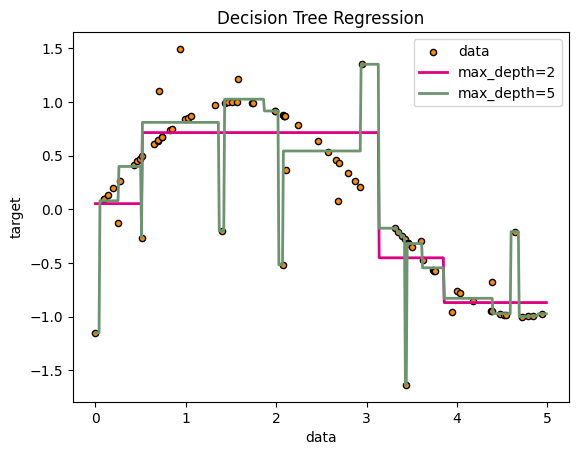

In [86]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="#DC0083", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="#6C946F", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# **SECTION 4: DIMENSIONALITY REDUCTION**

## **Kernel PCA**
Kernel PCA is a non-linear extension of PCA. 
- is able to find a projection of the data which linearly separates them while it is not the case with PCA.

Authors: 
- Mathieu Blondel
- Andreas Mueller
- Guillaume Lemaitre

License: BSD 3 clause

## Projecting data: PCA vs. KernelPCA

In [87]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

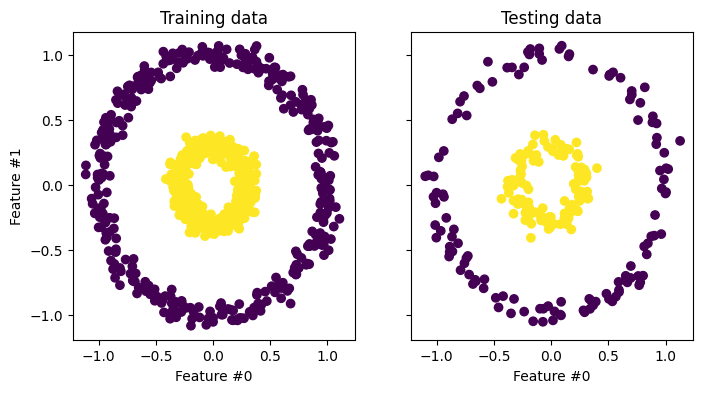

In [88]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

The samples from each class cannot be linearly separated: there is no straight line that can split the samples of the inner set from the outer set.



In [89]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

The kernel used here is a radial basis function (RBF) kernel.



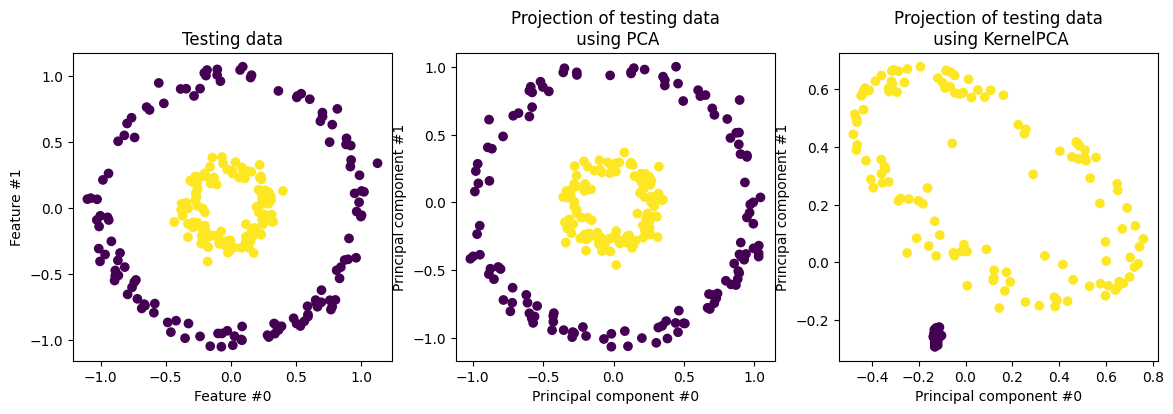

In [90]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

PCA (Principal Component Analysis) linearly transforms data by centering it, scaling it, and rotating it. This transformation makes the data more uniform, but in the case of concentric circles centered at zero, PCA only rotates the data without changing its scale. This rotation doesn't help if you want to use a linear classifier to separate different classes.

In contrast, using a kernel trick (like the RBF kernel) allows for non-linear transformations. This helps to "unfold" the data so that points from the same class are closer together and points from different classes are further apart. After this transformation, a linear classifier can effectively separate the different classes.








## Projecting into the original feature space

**Kernel PCA Reconstruction:**
- Kernel PCA may not always perfectly reconstruct data back to its original feature space.
- Unlike standard PCA, where reconstruction is exact if the number of principal components equals the original number of features, Kernel PCA involves non-linear transformations.
- This non-linearity can make it difficult to accurately map the data back to the original feature space.







In [91]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

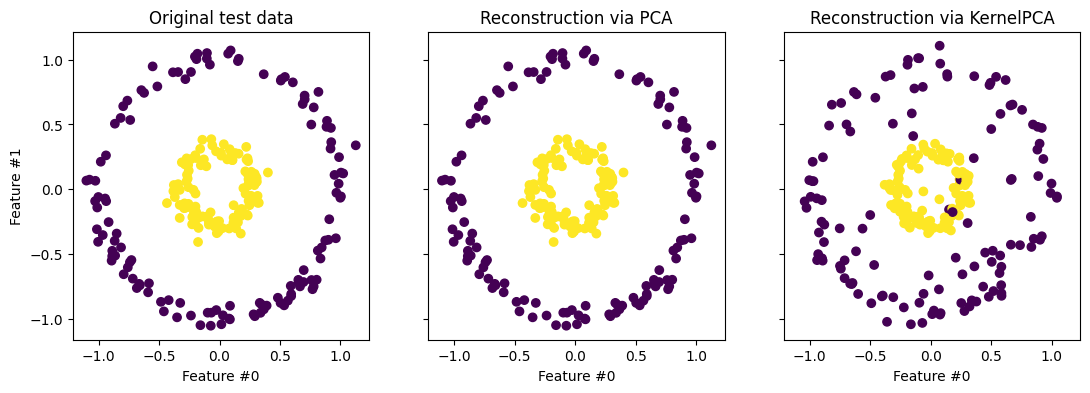

In [92]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

**PCA Reconstruction:**
- PCA can perfectly reconstruct data if the number of principal components equals the original number of features.

**Kernel PCA Reconstruction:**
- Exact reconstruction is not possible with Kernel PCA because it uses non-linear transformations.
- Inverse transformation relies on a Kernel Ridge regression model that learns how to map from the Kernel PCA space back to the original feature space.
- This method introduces approximations, leading to small differences in reconstruction.

**Improving Reconstruction**:
- To enhance reconstruction accuracy in Kernel PCA, you can adjust the regularization parameter, alpha.
- Alpha controls how much the model relies on the training data during the mapping process.

# **SECTION 5: MODEL SELECTION**

## Demonstration of multi-metric evaluation on cross_val_score and GridSearchCV

Multiple Metric Parameter Search

- **Multiple Metric Search**:
  - You can evaluate models using multiple metrics by setting the `scoring` parameter to either:
    - A list of metric names.
    - A dictionary mapping metric names to scorer functions.
  - The results for each metric are available in the `cv_results_` dictionary, with keys ending in the metric name (e.g., `'mean_test_precision'`, `'rank_test_precision'`).

- **Best Results**:
  - `best_estimator_`: The model with the best score based on the metric specified in `refit`.
  - `best_index_`: The index of the best score.
  - `best_score_`: The best score achieved for the metric specified in `refit`.
  - `best_params_`: The parameters of the best model.

In [93]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


## Running GridSearchCV using multiple evaluation metrics

In [94]:
X, y = make_hastie_10_2(n_samples=8000, random_state=42)

# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring=scoring,
    refit="AUC",
    n_jobs=2,
    return_train_score=True,
)
gs.fit(X, y)
results = gs.cv_results_

#### Plotting the result

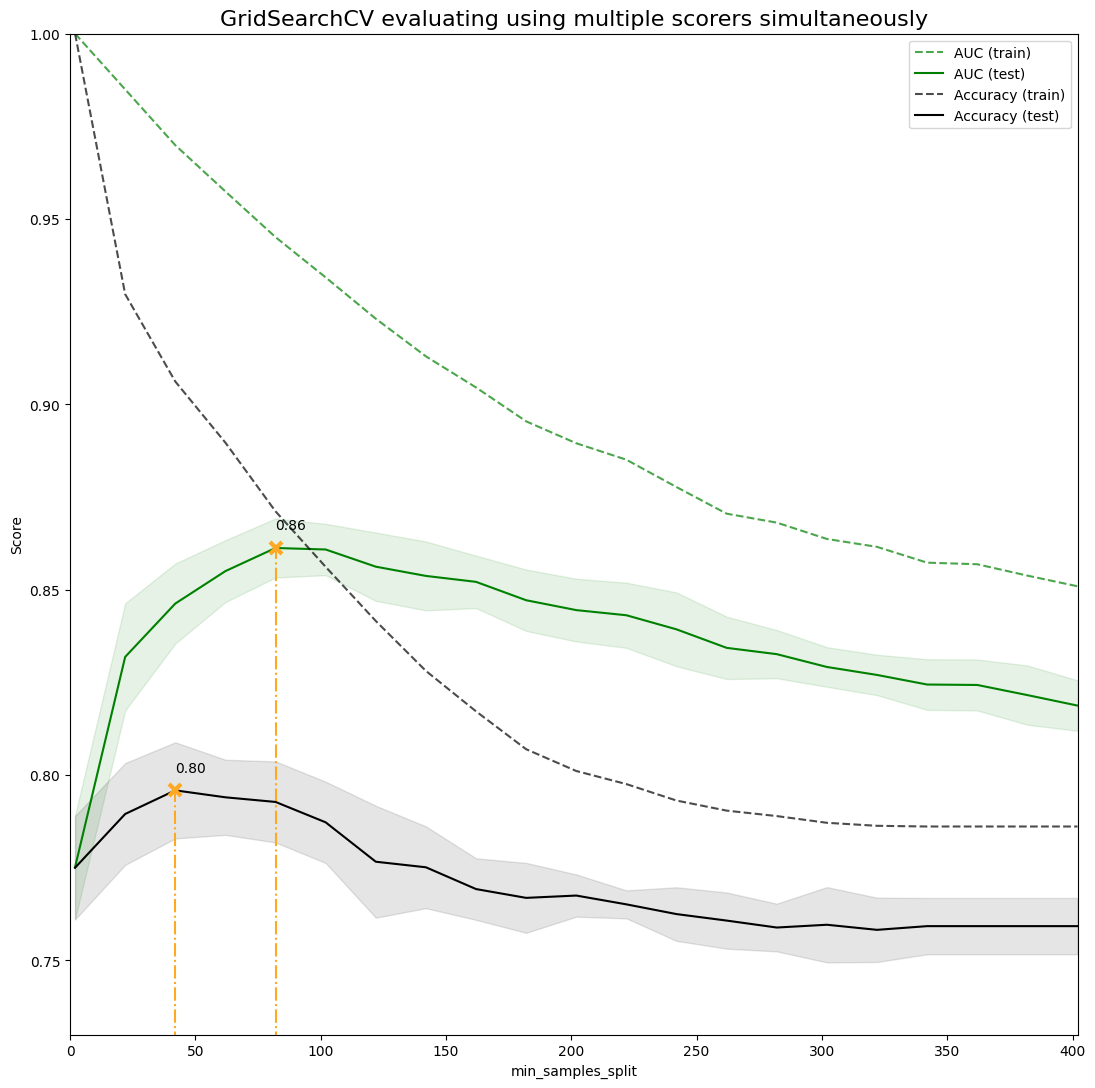

In [95]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)

for scorer, color in zip(sorted(scoring), ["g", "k"]):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=color,
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color='#FFA823',
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

# **TASKS**

Group 1: Pre-processing and Classification

For this task, I used the UCI dataset for Breast Cancer. The original dataset is found [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). 

## Preliminaries

### Import Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Setting a random seed for reproducibility
np.random.seed(43)

# Color palette
colors = ['#6C946F', '#FFD35A', '#FFA823', '#DC0083']


I wasn't sure why my github wasn't working so I tried the fix of ignoring the ssl and it finally worked.

In [97]:
# Loading the dataset
import ssl

# Ignore SSL certificate errors
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_csv('https://raw.githubusercontent.com/jinzalabim/DATA103-Library/main/Breast_Cancer.csv')
df.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

## **TASK 1: Data Preprocessing**

In [98]:
# Drop the 'id' column from the dataset
df = df.drop(columns=['id'])

In [99]:
X = df.drop(columns=['diagnosis'])  # Exclude 'diagnosis'
y = df['diagnosis']  # Target variable

/var/folders/ds/fxpc47td4hl39wx2qvtmqcj80000gp/T/ipykernel_61670/2560397158.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette=['#FFA823', '#DC0083'])


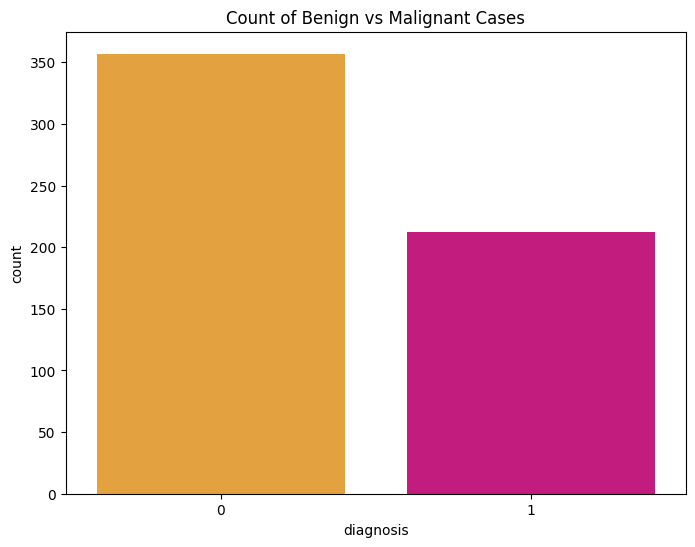

In [100]:
# Encoding 'diagnosis' column: M = 1, B = 0
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Countplot to show the number of Benign vs Malignant cases
plt.figure(figsize=(8,6))
sns.countplot(x='diagnosis', data=df, palette=['#FFA823', '#DC0083'])
plt.title('Count of Benign vs Malignant Cases')
plt.show()



In [101]:
# Get correlation matrix
correlation_matrix = df.corr()

# Display the correlation table
correlation_matrix['diagnosis'].sort_values(ascending=False)


diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

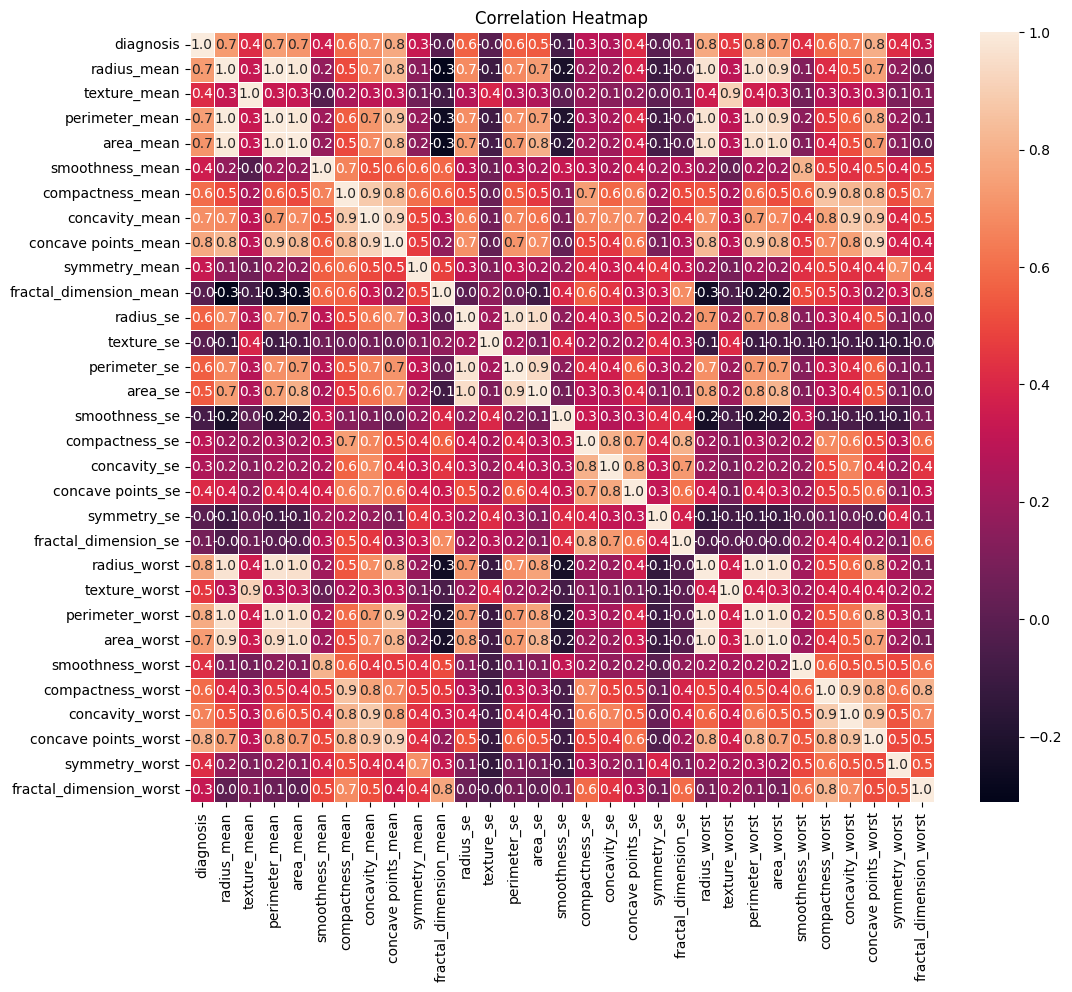

In [102]:
#Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()


*Note: I used this instead of the given palette when analyzing because I have troubles identifying green tones.* Just to be sure I'm looking at the colors correctly, I also checked the correlation below again:

In [103]:
# Check for high correlation (usually above 0.9)
high_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr != 1]  # Exclude the correlation of a feature with itself
high_corr[high_corr > 0.9]


perimeter_mean        radius_mean             0.997855
radius_mean           perimeter_mean          0.997855
radius_worst          perimeter_worst         0.993708
perimeter_worst       radius_worst            0.993708
radius_mean           area_mean               0.987357
area_mean             radius_mean             0.987357
perimeter_mean        area_mean               0.986507
area_mean             perimeter_mean          0.986507
area_worst            radius_worst            0.984015
radius_worst          area_worst              0.984015
area_worst            perimeter_worst         0.977578
perimeter_worst       area_worst              0.977578
perimeter_se          radius_se               0.972794
radius_se             perimeter_se            0.972794
perimeter_worst       perimeter_mean          0.970387
perimeter_mean        perimeter_worst         0.970387
radius_worst          radius_mean             0.969539
radius_mean           radius_worst            0.969539
perimeter_

### Splitting Data
In this section, I decided to split the dataset into 75% training and 25% testing data

In [104]:
# Separate features and target variable
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [105]:
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [106]:
# Split data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=43)


In [107]:
# For training data
X_train_scaled = scaler.fit_transform(X_train)
# For test data
X_test_scaled = scaler.transform(X_test)


 For the test data only the transform() method is used because not doing it might scale both data independently and  give inaccurate results. The test data should be scaled based on the data you have trained for your model.

## **TASK 2: Classification**

### Model Training

In [108]:
# Initialize Random Forest Classifier
classifier = RandomForestClassifier(random_state=43)

# Train the model
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=43)

### Model Evaluation

In [109]:
# Predicting the test results
y_pred = classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

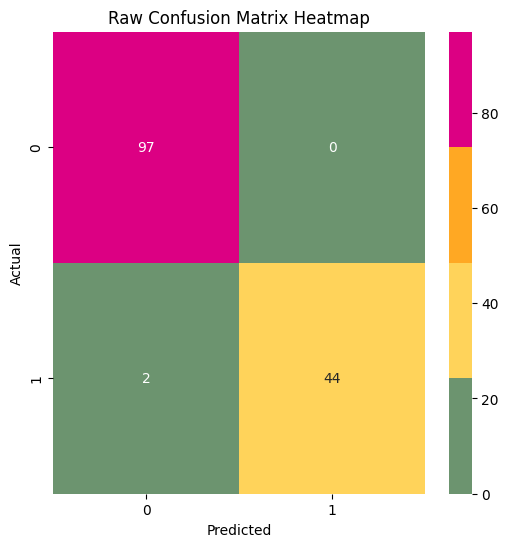

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        97
           1       1.00      0.96      0.98        46

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



In [110]:
# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap=sns.color_palette(colors, as_cmap=True))
plt.title('Raw Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


#### Normalized Confusion Matrix

Normalization is done by dividing each cell in the confusion matrix by the sum of the corresponding row. The lower right quadrant value (e.g., 44) represents the raw count of true positives for a class. When normalized, this value is divided by the total number of actual instances for that class.

Formula: Normalized value = $44 / 46 ≈ 0.9565$  or $95.65% $

The change in color is because the heatmap's color mapping is designed to represent the range of normalized values, which can differ significantly from the range of raw counts.

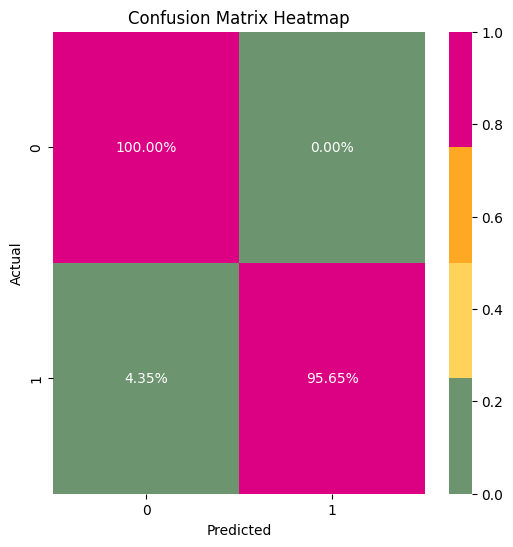

In [111]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Normalizing the confusion matrix so proportions are better
conf_matrix_normalized = conf_matrix.astype(float) / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap=sns.color_palette(colors, as_cmap=True))
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Predicting System

In [112]:
# Define a function for prediction
def predict_breast_cancer(input_data):
    # Preprocess the input data (Standardize)
    input_data = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = classifier.predict(input_scaled)
    return 'Malignant' if prediction == 1 else 'Benign'


In [113]:
# Example usage (you can replace with new data input)
new_data = [17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]
print(predict_breast_cancer(new_data))

Malignant


I tried this in a hypothetical situation that a person has their results and would want to recheck their results using machine learning. Although, it's better just to give the results to a doctor than input 31+ data.

In [114]:
def get_user_input():
    print("Please enter the following features:")
    features = [
        'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
        'smoothness_mean', 'compactness_mean', 'concavity_mean', 
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
        'smoothness_se', 'compactness_se', 'concavity_se', 
        'concave points_se', 'symmetry_se', 'fractal_dimension_se',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
        'smoothness_worst', 'compactness_worst', 'concavity_worst', 
        'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
    ]
    
    user_data = []
    for feature in features:
        while True:
            try:
                value = float(input(f"Enter value for {feature}: "))
                user_data.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")
    
    return user_data

# Get user input
user_input = get_user_input()

# Predict using the user input
prediction = predict_breast_cancer(user_input)
print(f"The predicted diagnosis is: {prediction}")


Please enter the following features:
The predicted diagnosis is: Malignant


### Model Comparison


I tried doing the other models and I was pleasantly surprised that classification is still the best one used.

Random Forest Accuracy: 0.9860

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        97
           1       1.00      0.96      0.98        46

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



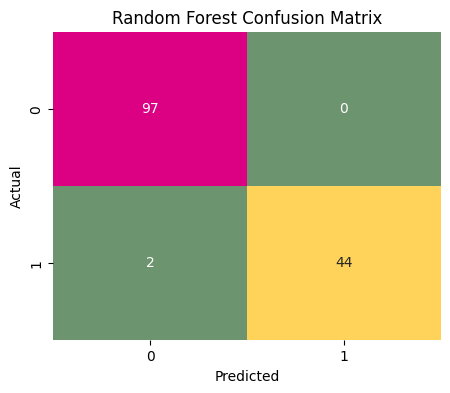

SVM Accuracy: 0.9720

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        97
           1       0.96      0.96      0.96        46

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



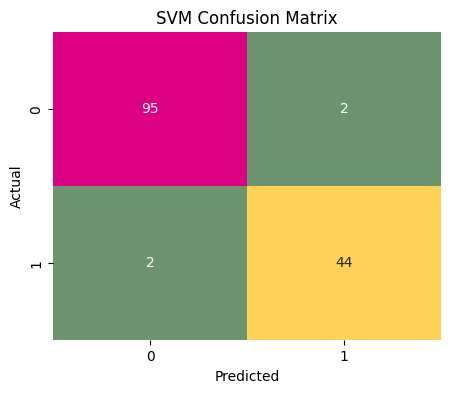

Logistic Regression Accuracy: 0.9790

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        97
           1       0.98      0.96      0.97        46

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



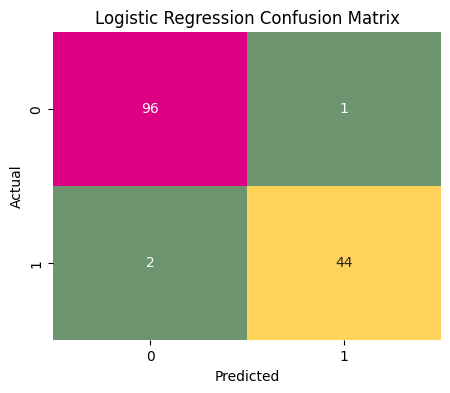

K-Nearest Neighbors Accuracy: 0.9790

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        97
           1       0.98      0.96      0.97        46

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



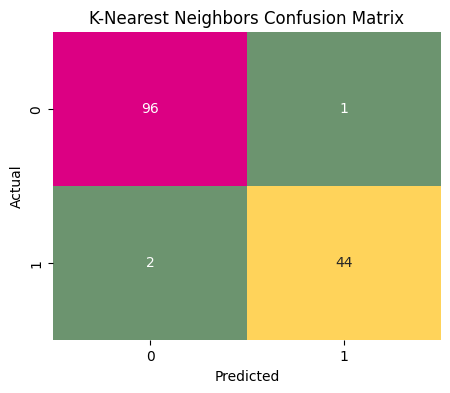

In [115]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# List of models
models = {
    'Random Forest': RandomForestClassifier(random_state=43),
    'SVM': SVC(random_state=43),
    'Logistic Regression': LogisticRegression(random_state=43, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train, predict, and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette(colors), cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
